In [2]:
# import the required packages
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date

## 1. HR Analytics

### 1.1 Load and Explore the data

In [2]:
#Loading data and reading head
df_hr = pd.read_csv('hr_data.csv')
df_hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
#Information regarding data
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
#Numeric Data Exploration
df_num = df_hr.select_dtypes(['int64', 'float64']).copy()
df_num.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


In [5]:
df_num.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
#Categorical Data Exploration
df_cat = df_hr.select_dtypes(['object']).copy()
df_cat.head()

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other


In [7]:
df_cat.describe()

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [8]:
df_cat.nunique()

department              9
region                 34
education               3
gender                  2
recruitment_channel     3
dtype: int64

Text(0, 0.5, 'Previous Year Rating')

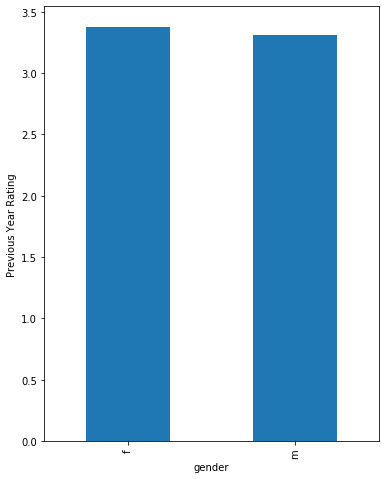

In [9]:
#Visualisation of avg Rating of Male and Female
plt.figure(figsize=(6,8))
df_hr.groupby('gender').previous_year_rating.mean().plot.bar()
plt.ylabel("Previous Year Rating")

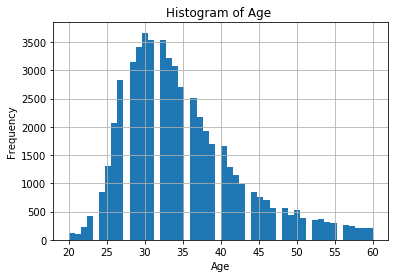

In [10]:
# Visualisation of Age
plt.hist(df_hr['age'], bins=50)
plt.xlabel('Age')
plt.ylabel('Frequency') 
plt.title('Histogram of Age ')
plt.grid(True)

plt.show()

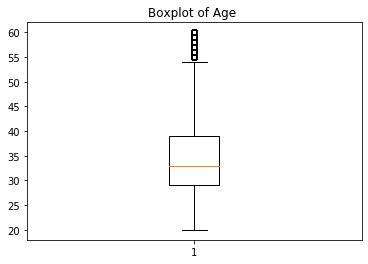

In [11]:
#Boxplot Visualisation of Age
plt.boxplot(df_hr['age'])
plt.title('Boxplot of Age ')

plt.show()
#Ignoring Outliers as the outliers do not have a huge difference from the 3rd quartile

### 1.2 Cleanse and Transform the data

In [12]:
#Display number of null values
df_hr.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [13]:
#Fill null values for "education" with "N/A"
df_hr['education'] = df_hr['education'].fillna('Below Secondary')

In [14]:
#Convert "Education" column from strings to 0, 1, 2 and 3
df_hr['education'] = df_hr['education'].map({"Below Secondary": 0, "Bachelor's": 1, "Master's & above": 2}).astype(int)

In [15]:
#Fill null values for "previous_year_rating" with the mode of column
df_hr['previous_year_rating'] = df_hr['previous_year_rating'].fillna(round(df_hr['previous_year_rating'].mean()))
df_hr['previous_year_rating'] = df_hr['previous_year_rating'].astype(int)

In [16]:
df_hr.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [17]:
#Convert "Gender" column from characters to 0 and 1
df_hr['gender'] = df_hr['gender'].map( {'f': 0, 'm': 1} ).astype(int)
df_hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,2,0,sourcing,1,35,5,8,1,0,49,0
1,65141,Operations,region_22,1,1,other,1,30,5,4,0,0,60,0
2,7513,Sales & Marketing,region_19,1,1,sourcing,1,34,3,7,0,0,50,0
3,2542,Sales & Marketing,region_23,1,1,other,2,39,1,10,0,0,50,0
4,48945,Technology,region_26,1,1,other,1,45,3,2,0,0,73,0


In [18]:
replaceArr = []
for i in range(len(df_hr['region'])):
    replaceArr.append(df_hr['region'][i].replace("region_", ""))

df_hr['region'] = replaceArr
df_hr['region'] = df_hr['region'].astype(int)
print(df_hr['region'])

0         7
1        22
2        19
3        23
4        26
         ..
54803    14
54804    27
54805     1
54806     9
54807    22
Name: region, Length: 54808, dtype: int32


In [19]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null int32
education               54808 non-null int32
gender                  54808 non-null int32
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    54808 non-null int32
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: int32(4), int64(8), object(2)
memory usage: 5.0+ MB


In [20]:
#Stratified Sampling due to high Unpromoted Value
df_hr['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [21]:
df0=df_hr[df_hr['is_promoted']==0]

In [22]:
df1=df_hr[df_hr['is_promoted']==1]

In [23]:
df2_sampled = df0.sample(n=len(df1), random_state=2).copy()
df2_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4668 entries, 6725 to 12976
Data columns (total 14 columns):
employee_id             4668 non-null int64
department              4668 non-null object
region                  4668 non-null int32
education               4668 non-null int32
gender                  4668 non-null int32
recruitment_channel     4668 non-null object
no_of_trainings         4668 non-null int64
age                     4668 non-null int64
previous_year_rating    4668 non-null int32
length_of_service       4668 non-null int64
KPIs_met >80%           4668 non-null int64
awards_won?             4668 non-null int64
avg_training_score      4668 non-null int64
is_promoted             4668 non-null int64
dtypes: int32(4), int64(8), object(2)
memory usage: 474.1+ KB


In [24]:
#Concat sampled data into dataframe
df_hr=pd.concat([df1,df2_sampled],axis=0)
df_hr['is_promoted'].value_counts()

1    4668
0    4668
Name: is_promoted, dtype: int64

### 1.3 Correlation Analysis

In [25]:
#General Correlation
df_hr.corr()

,employee_id,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.015970,-0.000089,0.011117,-0.010528,0.010593,0.027991,-0.000778,0.012639,0.038093,0.012452,0.018335
region,-0.015970,1.000000,-0.072495,0.091089,0.022692,-0.251140,-0.038025,-0.164309,-0.013186,-0.006006,0.040759,-0.022502
education,-0.000089,-0.072495,1.000000,-0.060943,-0.023829,0.424751,0.061054,0.287894,0.031744,0.017211,0.053361,0.066186
gender,0.011117,0.091089,-0.060943,1.000000,0.077464,-0.030575,-0.022987,-0.019674,-0.026376,0.006760,-0.021409,-0.021415
no_of_trainings,-0.010528,0.022692,-0.023829,0.077464,1.000000,-0.073286,-0.058502,-0.042717,-0.034267,-0.020329,0.042947,-0.044717
age,0.010593,-0.251140,0.424751,-0.030575,-0.073286,1.000000,0.050753,0.649614,-0.026295,-0.000293,-0.057514,-0.030066
previous_year_rating,0.027991,-0.038025,0.061054,-0.022987,-0.058502,0.050753,1.000000,0.039973,0.276950,0.057770,0.129430,0.284443
length_of_service,-0.000778,-0.164309,0.287894,-0.019674,-0.042717,0.649614,0.039973,1.000000,-0.046991,-0.056516,-0.035430,-0.010412
KPIs_met >80%,0.012639,-0.013186,0.031744,-0.026376,-0.034267,-0.026295,0.276950,-0.046991,1.000000,0.038701,0.032562,0.380519
awards_won?,0.038093,-0.006006,0.017211,0.006760,-0.020329,-0.000293,0.057770,-0.056516,0.038701,1.000000,0.177959,0.211287


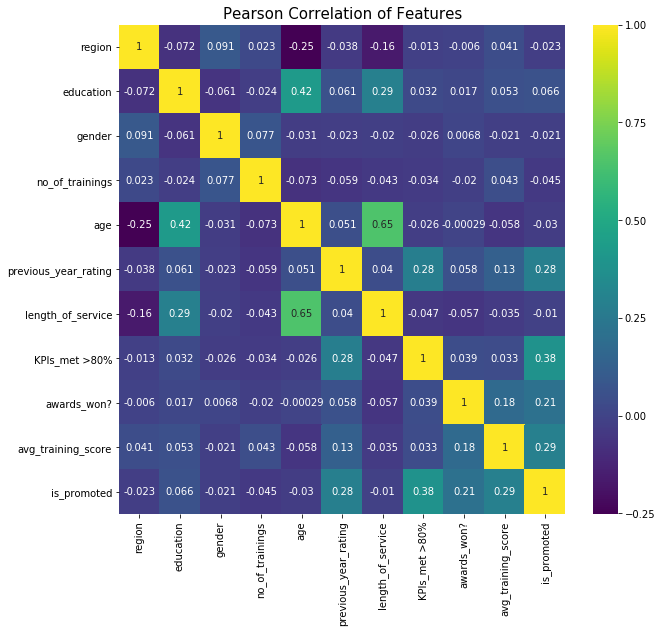

In [26]:
#Using heatmap
df_hr_copy = df_hr.drop(['employee_id','department','recruitment_channel'], axis = 1)
colormap = plt.cm.viridis
plt.figure(figsize=(10,9))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(df_hr_copy.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

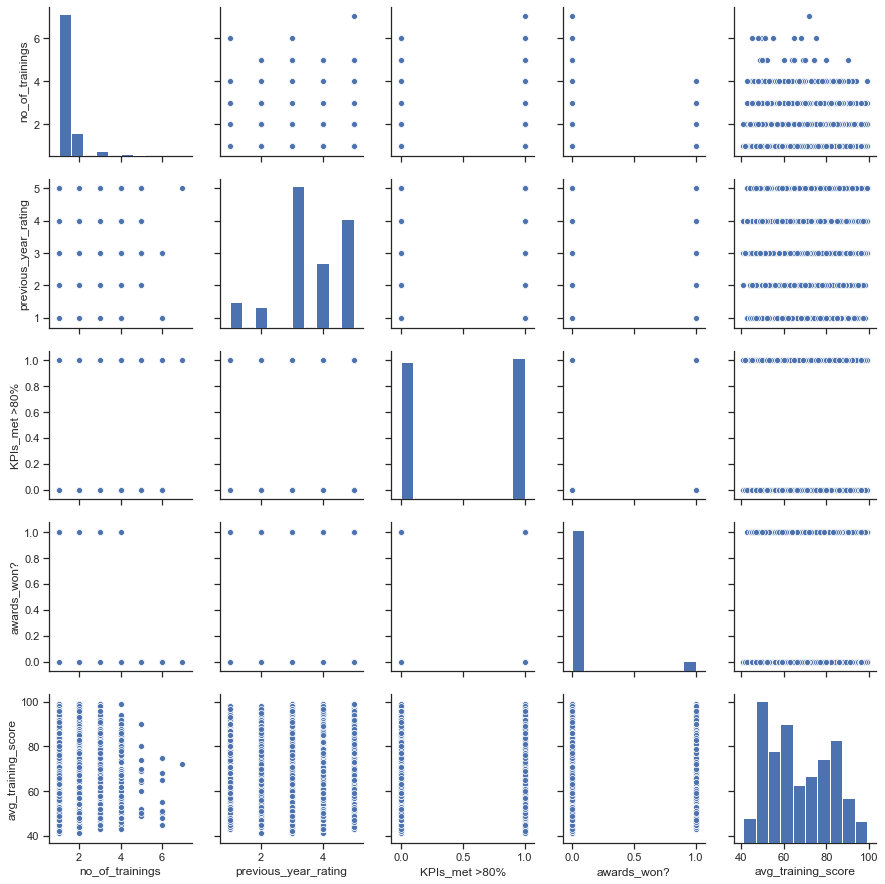

In [27]:
#Using Scatter Matrix
sns.set(style="ticks")
sns.pairplot(df_hr_copy[['no_of_trainings','previous_year_rating','KPIs_met >80%','awards_won?','avg_training_score']])

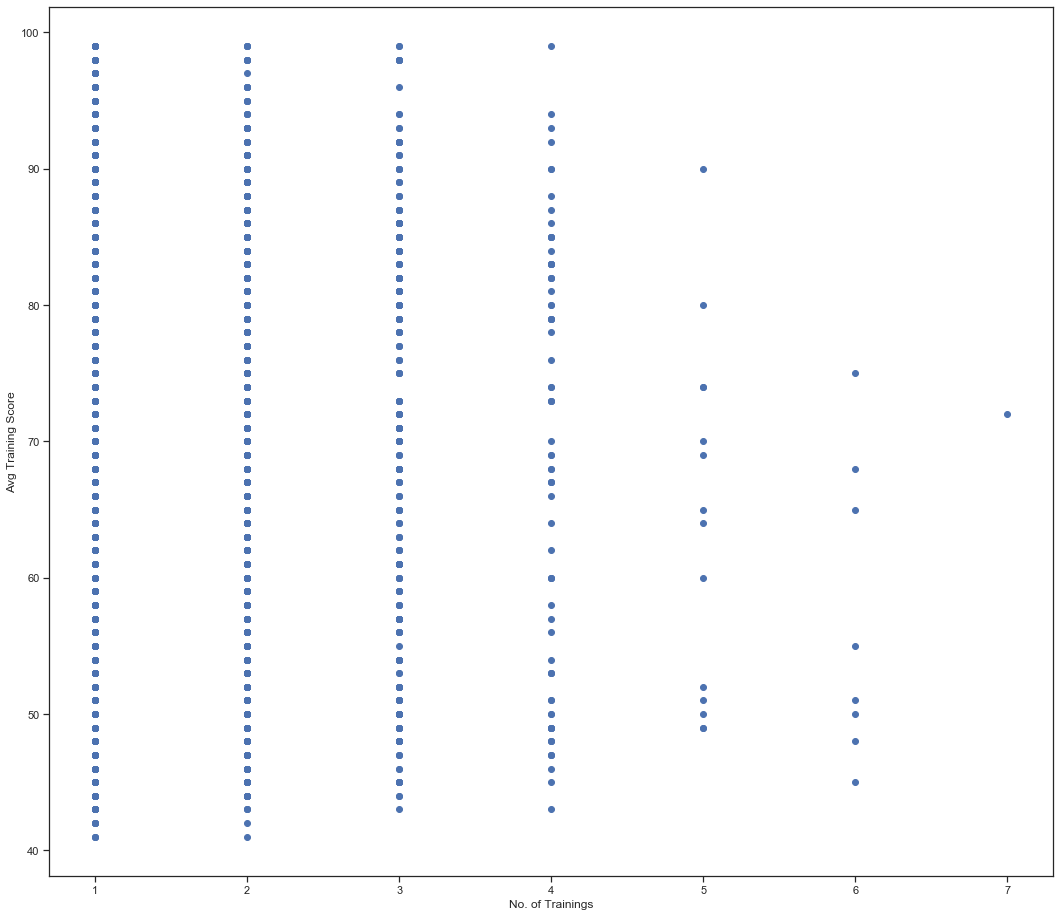

In [28]:
#Visualisation of Avg Score and Number of Trainings
plt.figure(figsize=(18,16))
plt.scatter(df_hr_copy['no_of_trainings'], df_hr_copy['avg_training_score'])
plt.xlabel('No. of Trainings')
plt.ylabel('Avg Training Score')
plt.show()

### 1.4 Export the data

In [3]:
df_hr_copy.to_csv('hr_data_new.csv', index=False)
#Data Prepped for Decision Tree Regression

NameError: name 'df_hr_copy' is not defined

## 2. Airbnb Singapore

### 2.1 Load and Explore the data

In [49]:
#Loading data and reading head
df_listing = pd.read_csv('listings.csv')
df_listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [50]:
#Information regarding data
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
id                                7907 non-null int64
name                              7905 non-null object
host_id                           7907 non-null int64
host_name                         7907 non-null object
neighbourhood_group               7907 non-null object
neighbourhood                     7907 non-null object
latitude                          7907 non-null float64
longitude                         7907 non-null float64
room_type                         7907 non-null object
price                             7907 non-null int64
minimum_nights                    7907 non-null int64
number_of_reviews                 7907 non-null int64
last_review                       5149 non-null object
reviews_per_month                 5149 non-null float64
calculated_host_listings_count    7907 non-null int64
availability_365                  7907 non-null int64
dtypes: float64(3

In [51]:
#Numeric Data Exploration
df_num2 = df_listing.select_dtypes(['int64', 'float64']).copy()
df_num2.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,266763,1.44255,103.79580,83,180,1,0.01,2,365
1,50646,227796,1.33235,103.78521,81,90,18,0.28,1,365
2,56334,266763,1.44246,103.79667,69,6,20,0.20,2,365
3,71609,367042,1.34541,103.95712,206,1,14,0.15,9,353
4,71896,367042,1.34567,103.95963,94,1,22,0.22,9,355


In [52]:
#Showing collated information on Numeric Data
df_num2.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


In [53]:
#Categorical Data Exploration
df_cat2 = df_listing.select_dtypes(['object']).copy()
df_cat2.head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,COZICOMFORT LONG TERM STAY ROOM 2,Francesca,North Region,Woodlands,Private room,2013-10-21
1,Pleasant Room along Bukit Timah,Sujatha,Central Region,Bukit Timah,Private room,2014-12-26
2,COZICOMFORT,Francesca,North Region,Woodlands,Private room,2015-10-01
3,Ensuite Room (Room 1 & 2) near EXPO,Belinda,East Region,Tampines,Private room,2019-08-11
4,B&B Room 1 near Airport & EXPO,Belinda,East Region,Tampines,Private room,2019-07-28


In [54]:
#Showing collated information on Categorical Data
df_cat2.describe()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,7905,7907,7907,7907,7907,5149
unique,7457,1833,5,43,3,1001
top,Luxury hostel with in-cabin locker - Single mixed,Jay,Central Region,Kallang,Entire home/apt,2019-08-12
freq,13,290,6309,1043,4132,152


In [55]:
df_cat2.nunique()

name                   7457
host_name              1833
neighbourhood_group       5
neighbourhood            43
room_type                 3
last_review            1001
dtype: int64

Text(0, 0.5, 'Reviews Per Month')

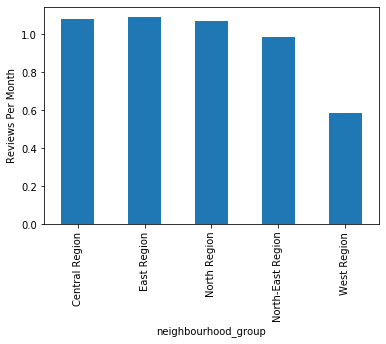

In [56]:
#Visualisation of Total No. of reviews against Region
df_listing.groupby('neighbourhood_group').reviews_per_month.mean().plot.bar()
plt.ylabel('Reviews Per Month')

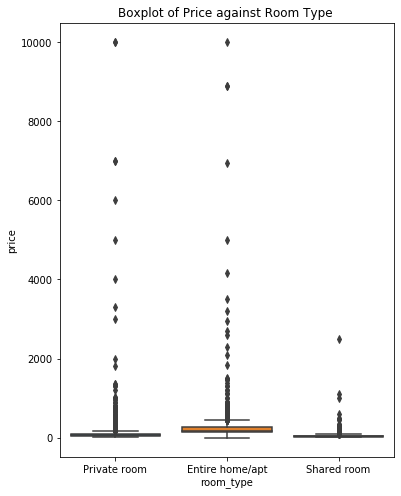

In [57]:
#Boxplot of Price against Room Type
plt.figure(figsize=(6,8))
sns.boxplot(y='price', x='room_type', data=df_listing)
plt.title('Boxplot of Price against Room Type ')
plt.show()

### 2.2 Cleanse and Transform the data

In [58]:
df_listing_copy = df_listing.drop(['id','name','host_id', 'host_name'], axis = 1)

In [59]:
uniqueArr = []
for i in range (0, len(df_listing_copy['neighbourhood'].unique())):
    uniqueArr.append(df_listing_copy['neighbourhood'].unique()[i])

print(uniqueArr)

['Woodlands', 'Bukit Timah', 'Tampines', 'Bedok', 'Bukit Merah', 'Newton', 'Geylang', 'River Valley', 'Jurong West', 'Rochor', 'Queenstown', 'Serangoon', 'Marine Parade', 'Pasir Ris', 'Toa Payoh', 'Outram', 'Punggol', 'Tanglin', 'Hougang', 'Kallang', 'Novena', 'Downtown Core', 'Bukit Panjang', 'Singapore River', 'Orchard', 'Ang Mo Kio', 'Bukit Batok', 'Museum', 'Sembawang', 'Choa Chu Kang', 'Central Water Catchment', 'Sengkang', 'Clementi', 'Jurong East', 'Bishan', 'Yishun', 'Mandai', 'Southern Islands', 'Sungei Kadut', 'Western Water Catchment', 'Tuas', 'Marina South', 'Lim Chu Kang']


In [60]:
neighbourMapArr = []
for i in df_listing_copy['neighbourhood']:
    index = uniqueArr.index(i)
    neighbourMapArr.append(index)
    
df_listing_copy['neighbourhood'] = neighbourMapArr
df_listing_copy['neighbourhood'] = df_listing_copy['neighbourhood'].astype(str)

In [61]:
print(df_listing_copy['neighbourhood_group'].unique())
df_listing_copy['neighbourhood_group'] = df_listing_copy['neighbourhood_group'].map({'North Region' : 1, 'Central Region' : 2, 'East Region' : 3, 'West Region' : 4, 'North-East Region' : 5}).astype(int)

['North Region' 'Central Region' 'East Region' 'West Region'
 'North-East Region']


In [62]:
df_listing_copy.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1,0,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,2,1,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,1,0,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,3,2,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,3,2,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [63]:
#Converting string datetime into datetime objects
df_listing_copy['last_review'] = df_listing_copy['last_review'].fillna(0)
datetimeArr = []
for i in df_listing_copy['last_review']:
    if i != 0:
        date_time_obj = datetime.strptime(i, '%Y-%m-%d')
        datetimeArr.append(date_time_obj)
    else:
        datetimeArr.append(np.nan)
df_listing_copy['last_review'] = datetimeArr

In [64]:
#Finding difference in days for every column
lastReview = df_listing_copy['last_review'].max()
earliestReview = df_listing_copy['last_review'].min()
df_listing_copy['last_review'] = df_listing_copy['last_review'].fillna(0)
daysArr = []
for i in df_listing_copy['last_review']:
    if (i != 0):
        if (i != lastReview):
            dateDiff = lastReview - i
            daysArr.append(dateDiff.days)
        else:
            daysArr.append(0)
    else:
        nullDateDiff = lastReview - earliestReview
        daysArr.append(nullDateDiff.days + 1)
df_listing_copy['last_review'] = daysArr
print(df_listing_copy['last_review'])

0       2136
1       1705
2       1426
3         16
4         30
        ... 
7902    2137
7903    2137
7904    2137
7905    2137
7906    2137
Name: last_review, Length: 7907, dtype: int64


In [65]:
df_listing_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 12 columns):
neighbourhood_group               7907 non-null int32
neighbourhood                     7907 non-null object
latitude                          7907 non-null float64
longitude                         7907 non-null float64
room_type                         7907 non-null object
price                             7907 non-null int64
minimum_nights                    7907 non-null int64
number_of_reviews                 7907 non-null int64
last_review                       7907 non-null int64
reviews_per_month                 5149 non-null float64
calculated_host_listings_count    7907 non-null int64
availability_365                  7907 non-null int64
dtypes: float64(3), int32(1), int64(6), object(2)
memory usage: 710.5+ KB


In [66]:
df_listing_copy['reviews_per_month'] = df_listing_copy['reviews_per_month'].fillna(round(df_listing_copy['reviews_per_month'].mean(), 2))
df_listing_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 12 columns):
neighbourhood_group               7907 non-null int32
neighbourhood                     7907 non-null object
latitude                          7907 non-null float64
longitude                         7907 non-null float64
room_type                         7907 non-null object
price                             7907 non-null int64
minimum_nights                    7907 non-null int64
number_of_reviews                 7907 non-null int64
last_review                       7907 non-null int64
reviews_per_month                 7907 non-null float64
calculated_host_listings_count    7907 non-null int64
availability_365                  7907 non-null int64
dtypes: float64(3), int32(1), int64(6), object(2)
memory usage: 710.5+ KB


In [67]:
df_listing_copy['room_type'] = df_listing_copy['room_type'].map({"Private room": 0, "Shared room": 1, "Entire home/apt": 2}).astype(int)

In [68]:
#Finding outliers and removing rows
df_listing_copy['price'] = df_listing_copy['price'].astype(float)
df_listing_copy['price'].describe()
#Q1 = 75
#Q3 = 200
#IQR = 200 - 75 = 125
#Max Outlier = 200 + 1.5*125 = 387.5

count     7907.000000
mean       169.332996
std        340.187599
min          0.000000
25%         65.000000
50%        124.000000
75%        199.000000
max      10000.000000
Name: price, dtype: float64

In [69]:
df_listing_copy = df_listing_copy.drop(df_listing_copy[df_listing_copy.price > 387.5].index)
df_listing_copy['price'].describe()

count    7537.000000
mean      133.800982
std        83.885574
min         0.000000
25%        62.000000
50%       118.000000
75%       181.000000
max       387.000000
Name: price, dtype: float64

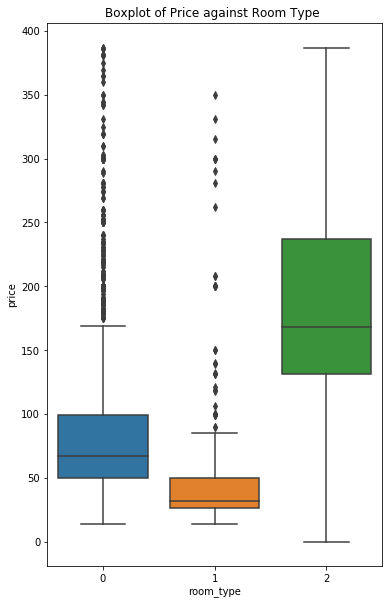

In [70]:
#Boxplot of Price against Room Type after Cleanup
plt.figure(figsize=(6,10))
sns.boxplot(y='price', x='room_type', data=df_listing_copy)
plt.title('Boxplot of Price against Room Type ')
plt.show()

### 2.3 Correlation Analysis

In [71]:
#General Correlation
df_listing_copy.corr()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,1.000000,0.417076,-0.135659,-0.231504,-0.171380,0.070373,-0.021598,0.026454,-0.048806,-0.163400,-0.086202
latitude,0.417076,1.000000,-0.039288,-0.218140,-0.196133,0.080172,-0.011512,0.061661,-0.016866,-0.156440,-0.066893
longitude,-0.135659,-0.039288,1.000000,0.067638,0.022243,-0.034578,0.106296,-0.042717,0.096248,0.050249,-0.040168
room_type,-0.231504,-0.218140,0.067638,1.000000,0.593668,-0.064145,-0.025259,-0.011616,0.012027,0.358688,0.028729
price,-0.171380,-0.196133,0.022243,0.593668,1.000000,-0.106572,-0.058371,0.038437,0.035200,0.225042,0.103933
minimum_nights,0.070373,0.080172,-0.034578,-0.064145,-0.106572,1.000000,-0.078854,0.202611,-0.089247,-0.012676,0.160101
number_of_reviews,-0.021598,-0.011512,0.106296,-0.025259,-0.058371,-0.078854,1.000000,-0.365460,0.596599,-0.151753,-0.067324
last_review,0.026454,0.061661,-0.042717,-0.011616,0.038437,0.202611,-0.365460,1.000000,-0.115105,0.091968,0.026142
reviews_per_month,-0.048806,-0.016866,0.096248,0.012027,0.035200,-0.089247,0.596599,-0.115105,1.000000,-0.145565,-0.087797
calculated_host_listings_count,-0.163400,-0.156440,0.050249,0.358688,0.225042,-0.012676,-0.151753,0.091968,-0.145565,1.000000,0.243714


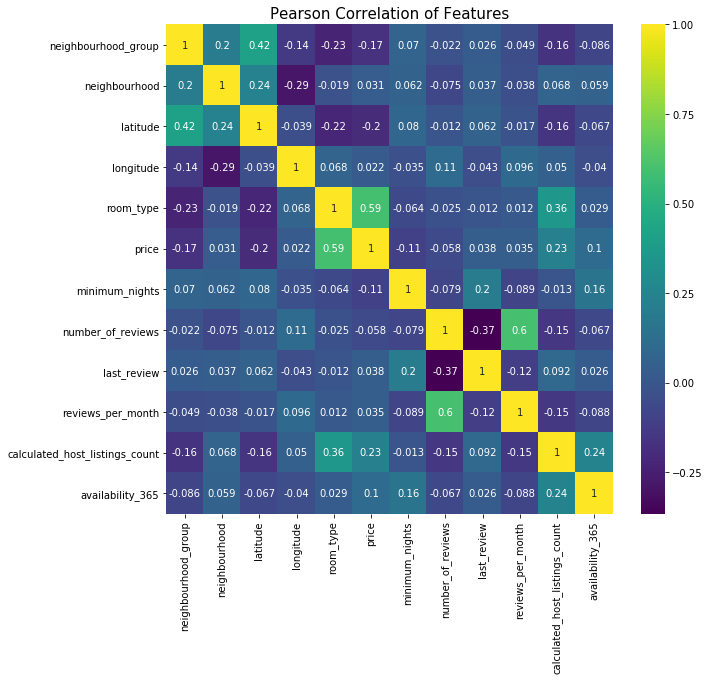

In [72]:
#using heatmap
colormap = plt.cm.viridis
plt.figure(figsize=(10,9))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(df_listing_copy.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

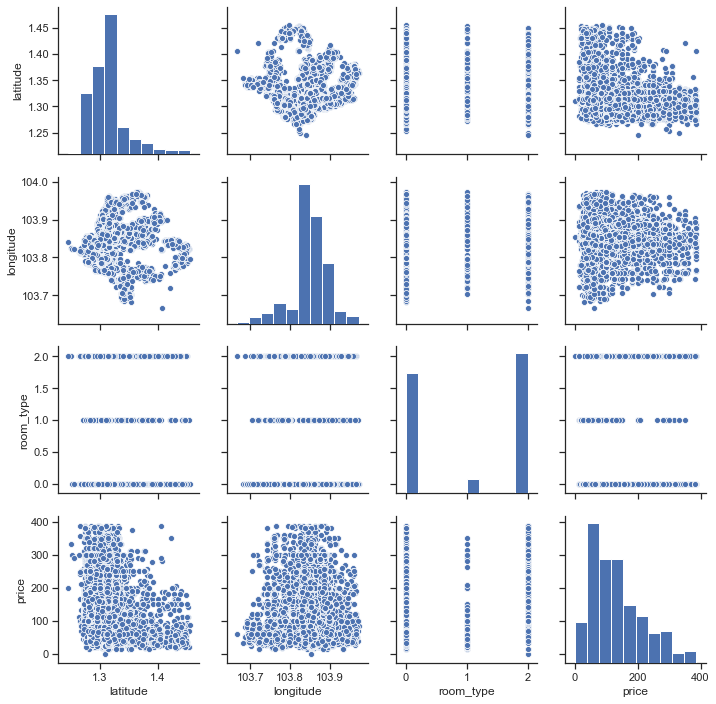

In [73]:
#Using Scatter Matrix
sns.set(style="ticks")
sns.pairplot(df_listing_copy[['latitude','longitude','room_type','price']])

### 2.4 Export the data

In [74]:
df_listing_copy.to_csv('listing_new.csv', index=False)
#Data Prepped for Logistic Regression